# Assignment 2
Submission Group: Luca Kosina (6084778), Sascha Mühlinghaus (7075485)

### Part 1: Conditioning (Lecture 2)

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# implementing paradigms with Rescorla-Wagner model:
# new_weight = alpha * (reward - (stim * weight)) * stim

def update_expectation(weight, stim, reward, alpha=0.1, beta=0.1):
    """
    Update the expectation based on two stimuli and a reward/punishment according to Rescorla-Wagner learning rule.

    Parameters:
    weight (array): List of weights for each stimulus.
    stim (array): Array of stimuli presentations.
    reward (array): The received reward or punishment.
    alpha (float): The learning rate for stimulus 1.
    beta (float): The learning rate for stimulus 2.

    Returns:
    tuple: The updated weight(s) and delta value.
    """
    if np.isscalar(stim):
        # compute value
        value = weight * stim
        # calculate prediction/expectation/delta error
        delta = reward - value  # sum to avoid broadcasting issues
        # update expectations
        weight += alpha * delta * stim  # scalar stim used
        return weight, delta, value
    else:
        # compute value
        value = weight[0] * stim[0] + weight[1] * stim[1]
        # calculate prediction/expectation/delta error
        delta = reward - np.sum(value)  # sum to avoid broadcasting issues
        # update expectations
        weight[0] += alpha * delta * stim[0]  # scalar stim[0] used
        weight[1] += beta * delta * stim[1]   # scalar stim[1] used
        return weight[0], weight[1], delta, value

### Interpretation Training-Blocking-Paradigm: 
For the blocking paradigm the Rescorla-Wagner model approaches the idealized expectation. Hence, the model accounts for the behaviour of the animal realistically.

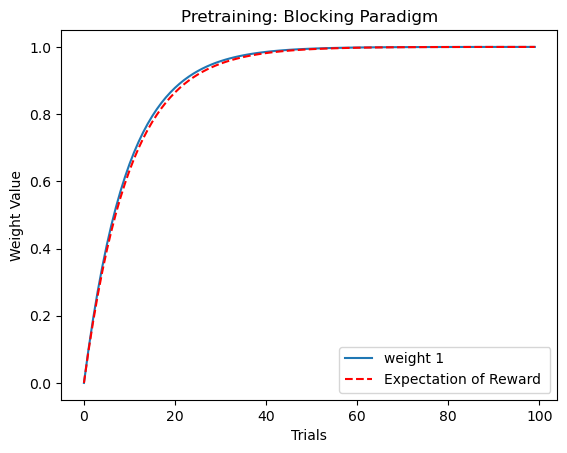

In [3]:
n_trials = 100  # number of trials
weights = [0, 0]  # initial weights for two stimuli
stim_blocking = np.array([np.ones(n_trials), np.zeros(n_trials)])  # stimuli for blocking paradigm
reward = np.ones(n_trials)  # reward for blocking paradigm
w1_list = [weights[0]]  # initialize weight list for stimulus 1
alpha = 0.1  # learning rate for stimulus 1
beta = 0.1   # learning rate for stimulus 2

# idealized expectation for blocking paradigm
stimuli_us = np.ones(100)
stimuli_cs = np.ones(100)

idealized_expectation = np.ones(n_trials)

# pre-training for blocking paradigm
for i in range(1, n_trials):
    # update expectation
    w1, w2, delta, value = update_expectation(weights, stim_blocking[:,i], reward[i], alpha, beta)
    # append the weight for stimulus 1
    w1_list.append(w1)

# idealized expectation of reward
expectation = 1 - np.exp(-alpha*np.arange(n_trials))

# Plot the weights over trials
plt.plot(w1_list, label='weight 1')
plt.plot(expectation, label="Expectation of Reward ", color="red", linestyle='--')
plt.xlabel("Trials")
plt.ylabel("Weight Value")
plt.legend()
plt.title("Pretraining: Blocking Paradigm")
plt.show()

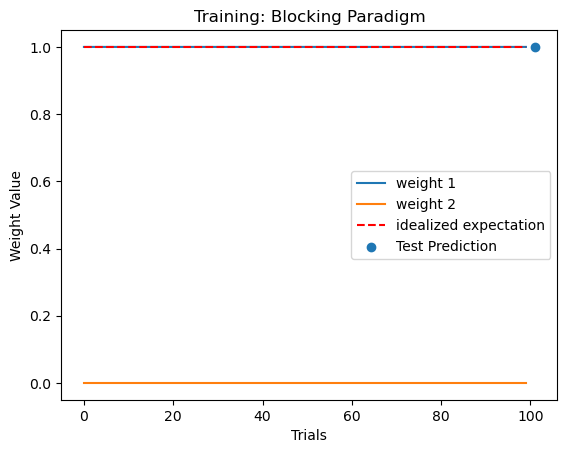

In [4]:
weights = [w1, 0] # initial weights for two stimuli

w1_list = [weights[0]] # initialize weight list 1
w2_list = [weights[1]] # initialize weight list 2

idealized_expectation1 = np.array([1]*n_trials)  # idealized expectation for weight 1
idealized_expectation2 = np.array([0]*n_trials)  # idealized expectation for weight 2

# blocking paradigm 
for i in range(1, n_trials):
    # update expectation
    w1, w2, delta, value = update_expectation(weights, stim_blocking[:,i], reward[i], alpha, beta)
    # append to weight lists
    w1_list.append(w1)
    w2_list.append(w2)


# Plot the weights over trials
plt.plot(w1_list, label='weight 1')
plt.plot(w2_list, label='weight 2')
plt.plot(idealized_expectation1, label='idealized expectation', linestyle='--', color='red')
plt.scatter(101, value, label='Test Prediction')
plt.xlabel("Trials")
plt.ylabel("Weight Value")
plt.legend()
plt.title("Training: Blocking Paradigm")
plt.show()

### Interpretation Inhibitory Conditioning Paradigm: 
Depending on the learning rate and number of trials it may take longer or shorter for the weights to converge toward the idealized expectations. Rascorla-Wagner also accounts for this paradigm. 

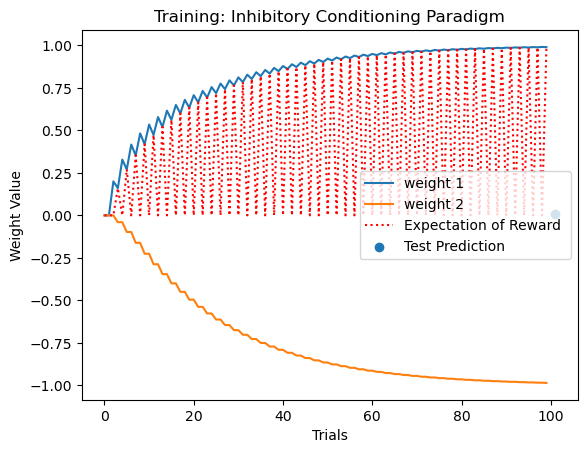

In [5]:
weights = [0, 0] # initial weight for stimulus 2
w1_list = [weights[0]] # initialize weight list 1
w2_list = [weights[1]] # initialize weight list 2
n_trials = 100 # number of trials
alpha = 0.2 # learning rate for stimulus 1
beta = 0.2 # learning rate for stimulus 2

# generate inhibitory conditioning stimuli 
stim_inhib = np.array([np.ones(n_trials), [0, 1]*50])

idealized_expectation1 = np.array([1]*n_trials)  # idealized expectation for weight 1
idealized_expectation2 = np.array([-1]*n_trials)  # idealized expectation for weight 2

# generate reward
reward = np.array([1, 0]*100)
# inhibitory conditioning paradigm 
for i in range(1, n_trials):
    # update expectation
    w1, w2, delta, value = update_expectation(weights, stim_inhib[:,i], reward[i], alpha, beta)
    # append to weight lists
    w1_list.append(w1)
    w2_list.append(w2)


# idealized expectation of reward
#expectation = 1 - np.exp(-alpha*np.arange(n_trials))
expectation = w1_list * np.array(np.tile([0,1], int(n_trials/2)))

# Plot the weights over trials
plt.plot(w1_list, label='weight 1')
plt.plot(w2_list, label='weight 2')
plt.plot(expectation, label="Expectation of Reward ", color="red", linestyle=':')
plt.scatter(101, value, label='Test Prediction')
plt.xlabel("Trials")
plt.ylabel("Weight Value")
plt.legend()
plt.title("Training: Inhibitory Conditioning Paradigm")
plt.show()

### Interpretation Overshadowing Paradigm: 
Again for the overshadowing the weights approach the expected values. The expected values in the overshadowing paradigm are proportional to the difference in learning rate (alpha, beta). Rescorla-Wagner also accounts for this paradigm.

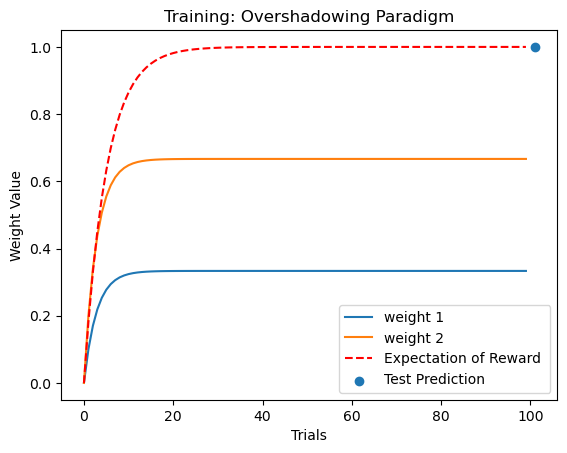

In [6]:
weights = [0, 0] # initial weight for stimulus 2
w1_list = [weights[0]] # initialize weight list 1
w2_list = [weights[1]] # initialize weight list 2

n_trials = 100

alpha = 0.1 # learning rate for stimulus 1
beta = 0.2 # learning rate for stimulus 2

idealized_expectation1 = np.array([.666]*n_trials)  # idealized expectation for weight 1
idealized_expectation2 = np.array([.333]*n_trials)  # idealized expectation for weight 2

# generate overshadowing stimuli 
stim_overshad = np.array([np.ones(n_trials), np.ones(n_trials)])  # stimuli for blocking paradigm
# generate reward
reward = np.ones(n_trials)
# overshadowing paradigm 
for i in range(1, n_trials):
   # update expectation
    w1, w2, delta, value = update_expectation(weights, stim_overshad[:,i], reward[i], alpha, beta)
    # append to weight lists
    w1_list.append(w1)
    w2_list.append(w2)

# idealized expectation of reward
expectation = 1 - np.exp(-beta*np.arange(n_trials))

# Plot the weights over trials
plt.plot(w1_list, label='weight 1')
plt.plot(w2_list, label='weight 2')
plt.plot(expectation, label="Expectation of Reward ", color="red", linestyle='--')
plt.scatter(101, value, label='Test Prediction')
plt.xlabel("Trials")
plt.ylabel("Weight Value")
plt.legend()
plt.title("Training: Overshadowing Paradigm")
plt.show()

### Interpretation Secondary Conditioning Paradigm: 
During the pretraining the weight approaches the idealized expectation following an exponential function. However, the Rescorla-Wagner does not account for the secondary conditioning paradigm because it is uncapable of associating predictors of rewards with a reward. Therefore, the indirect coupling of S2 predicting S1 and S1 predicting the reward does not work.

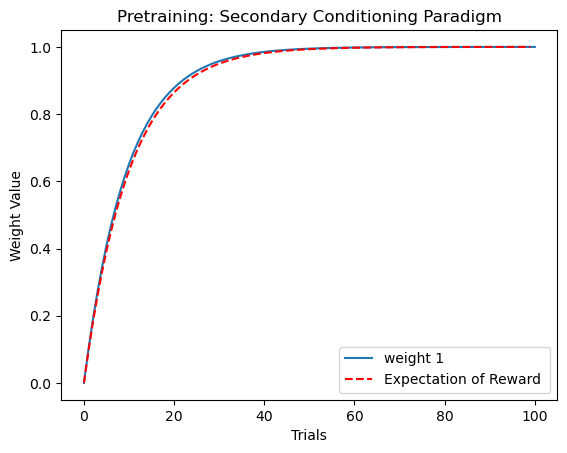

In [7]:
# pre-training for secondary conditioning paradigm
n_trials = 100
weights = [0, 0] # initial weight for stimulus 2
w1_list = [weights[0]] # initialize weight list 1
w2_list = [weights[1]] # initialize weight list 2
reward = np.ones(n_trials) # reward for secondary conditioning paradigm

idealized_expectation1 = np.array([1]*n_trials)  # idealized expectation for weight 1

stim_sec = np.array([np.ones(n_trials), np.zeros(n_trials)]) # stimuli for secondary conditioning paradigm
alpha = 0.1 # learning rate for stimulus 1
beta = 0.1 # learning rate for stimulus 2
for i in range(n_trials):
    # update expectation
    w1, w2, delta, value = update_expectation(weights, stim_sec[:,i], reward[i], alpha, beta)
    # append to weight lists
    w1_list.append(w1)
    w2_list.append(w2)



# idealized expectation of reward
expectation = 1 - np.exp(-alpha*np.arange(n_trials))

# Plot the weights over trials
plt.plot(w1_list, label='weight 1')
plt.plot(expectation, label="Expectation of Reward ", color="red", linestyle='--')
plt.xlabel("Trials")
plt.ylabel("Weight Value")
plt.legend()
plt.title("Pretraining: Secondary Conditioning Paradigm")
plt.show()

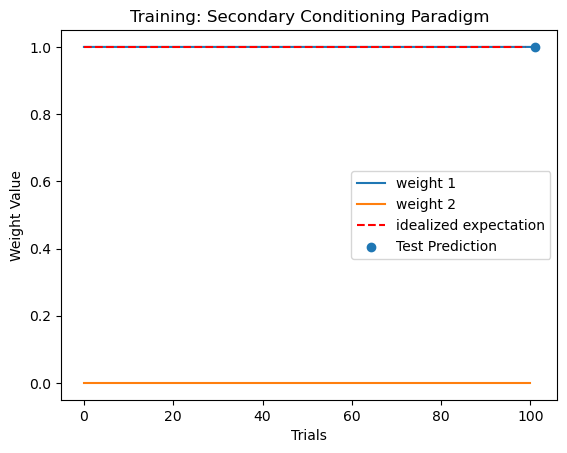

In [8]:
weights = [w1, 0] # initial weight for stimulus 2

w1_list = [weights[0]] # initialize weight list 1
w2_list = [weights[1]] # initialize weight list 2
alpha = 0.1 # learning rate for stimulus 1
beta = 0.1 # learning rate for stimulus 2

reward = np.ones(n_trials) # reward for secondary conditioning paradigm

idealized_expectation1 = np.array([1]*n_trials)  # idealized expectation for weight 1
idealized_expectation2 = np.array([1]*n_trials)  # idealized expectation for weight 2

# secondary conditioning paradigm
for i in range(n_trials):
    # update expectation
    w1, w2, delta, value = update_expectation(weights, stim_sec[:,i], reward[i], alpha, beta)
    # append to weight lists
    w1_list.append(w1)
    w2_list.append(w2)

# Plot the weights over trials
plt.plot(w1_list, label='weight 1')
plt.plot(w2_list, label='weight 2')
plt.plot(idealized_expectation1, label='idealized expectation', linestyle='--', color='red')
plt.scatter(101, value, label='Test Prediction')
plt.xlabel("Trials")
plt.ylabel("Weight Value")
plt.legend()
plt.title("Training: Secondary Conditioning Paradigm")
plt.show()

### Interpretation of Explaining-away Paradigm: 
The intuition of the explaining away paradigm is not captured by Rescorla-Wagner because (same reasoning as for the previous) the model cannot account for negative or positive predictive relationships between multiple stimuli.

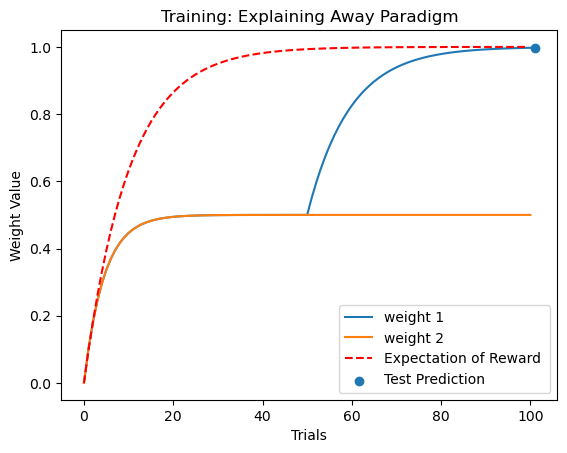

In [9]:
# explaining away paradigm
n_trials = 100
weights = [0, 0] # initial weight for stimulus 2
w1_list = [weights[0]] # initialize weight list 1
w2_list = [weights[1]] # initialize weight list 2

alpha = 0.1 # learning rate for stimulus 1
beta = 0.1 # learning rate for stimulus 2
reward = np.ones(n_trials) # reward for explaining away paradigm

idealized_expectation1 = np.array([1]*n_trials)  # idealized expectation for weight 1
idealized_expectation2 = np.concatenate([np.ones(50), np.zeros(50)])  # idealized expectation for weight 2

w1 = 0 # initial expectation
w2 = 0 # initial expectation
stim_exp = np.array([np.ones(n_trials), np.concatenate([np.ones(50), np.zeros(50)])]) # stimuli for explaining away paradigm

# explaining away paradigm
for i in range(n_trials):
    # update expectation
    w1, w2, delta, value = update_expectation(weights, stim_exp[:,i], reward[i], alpha, beta)
    # append to weight lists
    w1_list.append(w1)
    w2_list.append(w2)

# idealized expectation of reward
expectation = 1 - np.exp(-alpha*np.arange(n_trials))

# Plot the weights over trials
plt.plot(w1_list, label='weight 1')
plt.plot(w2_list, label='weight 2')
plt.plot(expectation, label="Expectation of Reward ", color="red", linestyle='--')
plt.scatter(101, value, label='Test Prediction')
plt.xlabel("Trials")
plt.ylabel("Weight Value")
plt.legend()
plt.title("Training: Explaining Away Paradigm")
plt.show()

## Part 2: Extinction (Lecture 3)

### Interpretation of State based Inference: 


For the first 50 trials the animal learns that the stimulus predicts a punishment, hence the weight of belief 1 is recursively updated and increases punishment prediction (for simplicity the punishment is represented by a positive value). When entering the second half of the training, the stimulus is not paired with the punishment anymore. Therefore, the weight of the belief of state 1 decreases until the probability of being in state 1 is below .5. The weight of state 2 which represents the no punishment state is updated but because there is no punishment it remains zero. This serves the purpose of integrating changing latent causes into our predictiion. 


In [10]:
# Define the number of trials
n_trials_day1 = 50
n_trials_day2 = 50
gap_days = 30
total_trials = n_trials_day1 + n_trials_day2 + 1  # 101 trials in total

# Create the temporal difference array
temporal_differences = np.zeros(total_trials)
temporal_differences[n_trials_day1] = 1  # 1-day difference between last trial of day 1 and first trial of day 2
temporal_differences[99] = gap_days  # 30-day difference to the last trial on day 33

# Create the true state of each trial 
true_state = np.array(np.concatenate([[1]*50, [0]*51, [0]]))

In [11]:
"""
Heuristic to compute the probability of being in a state given 
the similarity between states and ther temporal difference.

Parameters: 
previous state (float): Last state value.
similarity (float): similarity between states.
delay (float): temporal difference between states.

Returns:
tuple: The state probability and the current state.
"""

def state_heuristic(previous_state, similarity, delay):
    # calculate the probability of the current state
    probability = similarity*delay
    # calculate the probability of the other state
    prob_different_state = (1 - similarity)*delay 

    # calculate the probability of each state
    prob_state_1 = previous_state*probability + (1-probability)*prob_different_state
    prob_state_2 = previous_state*prob_different_state + (1-probability)*probability
    
    probability = prob_state_1 / (prob_state_1 + prob_state_2)

    # switch states if probability for previous state is below .5
    if probability < 0.5:
        if previous_state == 0.1 or previous_state == 0:
            current_state = 1
        else:
            current_state = 0
    else:
        current_state = previous_state

    return probability, current_state

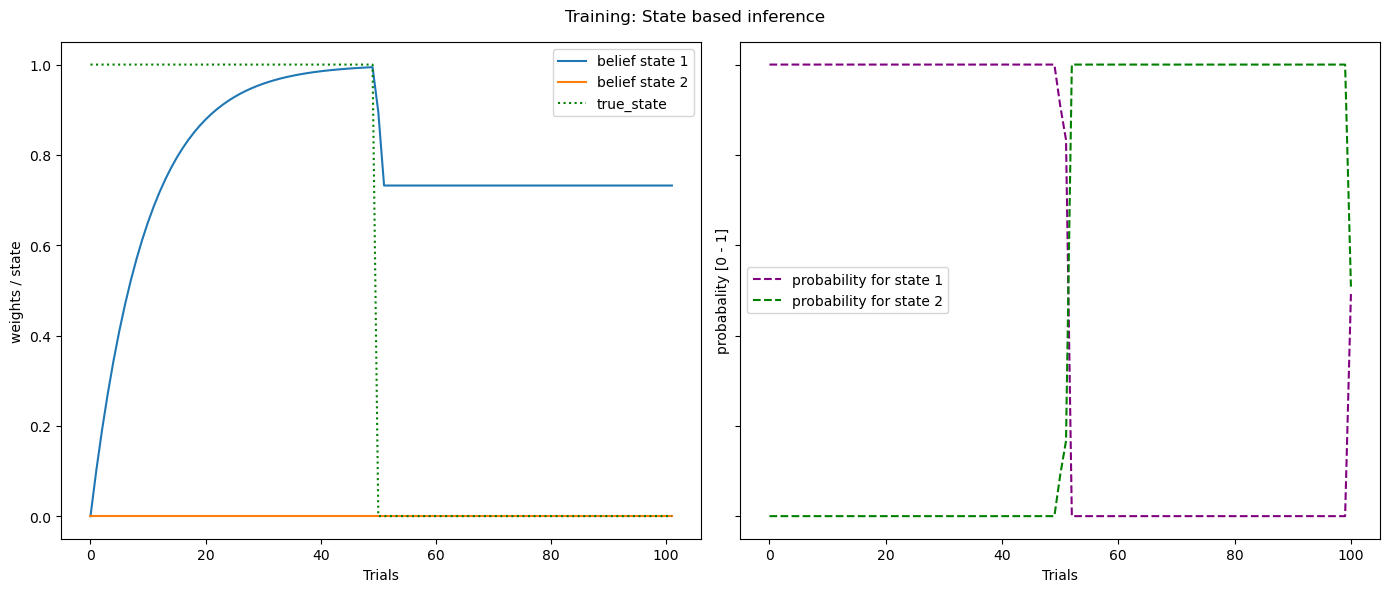

In [12]:
belief_state1 = np.concatenate([[0] * 50, np.full(52, np.nan)])
belief_state2 = np.array([0] * (total_trials+1))

experimental_stim = np.ones(total_trials+1)
experimental_reward = np.concatenate([np.ones(50), np.zeros(52), [0]])

current_state = 0.1
similarity = 1
delay_term = 1

alpha = 0.1
beta = 0.1

prob1 = []
prob2 = []

for i in range(1, total_trials+1):
    # update the current belief state and probability
    probability, current_state = state_heuristic(current_state, similarity, delay_term)
    # print(f'Trial {i}, Probability: {probability}, Current State: {current_state}, delay: {delay_term}')
    if current_state == 0.1:
        prob1.append(probability)
        prob2.append(1-probability)
    else:
        prob1.append(1-probability)
        prob2.append(probability)
    # factor for scaling the delay 
    scaling_factor = 1

    # update the delay 
    delay_term = 1 / (1 + (temporal_differences[i-1] * scaling_factor))
    
    # if stimuli are equal in two consecutive trials then similarity is 1
    if experimental_stim[i] == experimental_stim[i-1] and experimental_reward[i] == experimental_reward[i-1]:
        similarity = 1 
    else:
        similarity = 0

    if probability > 0.5 and current_state == 0.1:
        prediction, delta, value = update_expectation(belief_state1[i-1], experimental_stim[i], experimental_reward[i], alpha, beta)
        belief_state1[i] = prediction * probability
        # print(f'State1: Prediction={prediction}, Delta={delta}, Belief State 1[{i}]={belief_state1[i]}')
        
    else:
        prediction, delta, value = update_expectation(belief_state2[i-1], experimental_stim[i], experimental_reward[i], alpha, beta)
        belief_state2[i] = prediction * probability
        belief_state1[i] = belief_state1[i-1]
        # print(f'State2: Prediction={prediction}, Delta={delta}, Belief State 2[{i}]={belief_state2[i]}')
    

# Create a figure with two subplots 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
fig.suptitle("Training: State based inference")
# Plot 1
ax1.plot(belief_state1, label='belief state 1')
ax1.plot(belief_state2, label='belief state 2')
ax1.plot(true_state, label='true_state', linestyle=':', color='green')
ax1.set_xlabel("Trials")
ax1.set_ylabel("weights / state")
ax1.legend()

# Plot 2
ax2.plot(prob1, label='probability for state 1', linestyle='--', color='purple')
ax2.plot(prob2, label='probability for state 2', linestyle='--', color='green')
ax2.set_xlabel("Trials")
ax2.set_ylabel("probabality [0 - 1]")
ax2.legend()

plt.tight_layout()
plt.show()